# **Wine Quality Prediction**

-------------

## **Objective**

The main objective is to determine the quality of Wine with the help of Support Vector Machine.

## **Data Source**

Data is used from YBI Foundation Github repository.

## **Import Library**

In [10]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [2]:
import pandas as pd

## **Import Data**

In [15]:
data= pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/WhiteWineQuality.csv',sep=';')

## **Describe Data**

In [16]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## **Data Visualization**

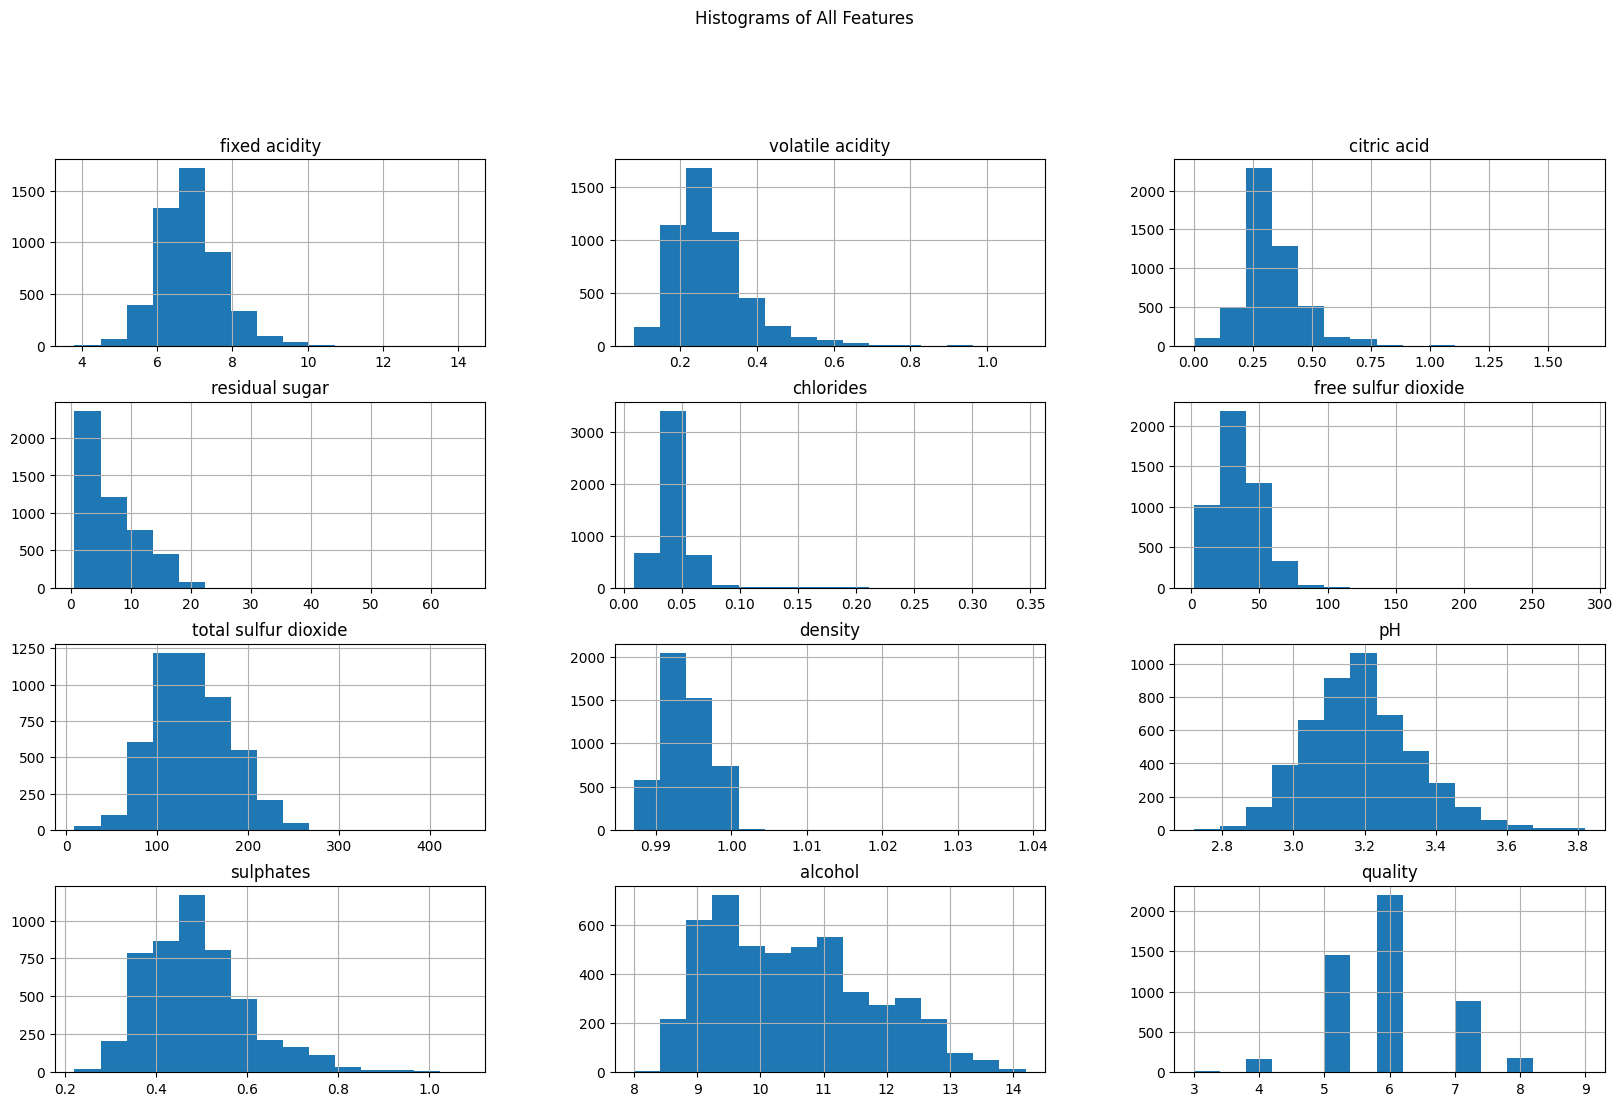

In [22]:
data.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Histograms of All Features')
plt.show()

In [17]:
data.shape

(4898, 12)

In [18]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [21]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **Data Preprocessing**

In [24]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [23]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

## **Define Target Variable (y) and Feature Variables (X)**

In [25]:
y=data['quality']

In [26]:
y.shape

(4898,)

In [27]:
x=data.drop(['quality'],axis=1)

In [28]:
x.shape

(4898, 11)

## **Train Test Split**

In [32]:
from sklearn.model_selection import train_test_split

In [39]:
x_train , x_test ,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2529)

In [40]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## **Modeling**

In [35]:
from sklearn.svm import SVC

In [36]:
svc=SVC()

In [43]:
svc.fit(x_train,y_train)

SVC()

## **Prediction**

In [46]:
y_pred=svc.predict(x_test)

In [47]:
y_pred.shape

(1470,)

In [48]:
y_pred

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

## **Model Evaluation**

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
print(confusion_matrix(y_test,y_pred))

[[  0   0   1   5   0   0   0]
 [  0   0   0  49   0   0   0]
 [  0   0  10 427   0   0   0]
 [  0   0  11 649   0   0   0]
 [  0   0   0 264   0   0   0]
 [  0   0   0  53   0   0   0]
 [  0   0   0   1   0   0   0]]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        49
           5       0.45      0.02      0.04       437
           6       0.45      0.98      0.62       660
           7       0.00      0.00      0.00       264
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00         1

    accuracy                           0.45      1470
   macro avg       0.13      0.14      0.09      1470
weighted avg       0.34      0.45      0.29      1470



C:\Users\jayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

## **Explaination**


1. import matplotlib.pyplot as plt
   - Imports the pyplot module from the matplotlib library, which is used for creating static, animated, and interactive visualizations in Python.

2. import numpy as np
   - Imports the numpy library, a fundamental package for scientific computing in Python, providing support for arrays and matrices.

3. import pandas as pd
   - Imports the pandas library, which is used for data manipulation and analysis.

4. data= pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/WhiteWineQuality.csv',sep=';')
   - Reads a CSV file from a URL into a pandas DataFrame named data, with a semicolon (;) as the separator.

5. data.describe()
   - Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.

6. data.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Histograms of All Features')
plt.show()
   - Creates histograms for all features in the DataFrame data, with 15 bins per histogram, and displays them in a grid layout of 5 rows by 3 columns. Sets a title for the entire figure and shows the plot.

7. data.shape
   - Returns the dimensionality of the DataFrame data, i.e., the number of rows and columns.

8. data.columns
   - Returns the column labels of the DataFrame data.

9. data.dtypes
   - Returns the data types of each column in the DataFrame data.

10. data.info()
    - Provides a concise summary of the DataFrame data, including the number of non-null entries and the data type of each column.

11. data.head()
    - Returns the first 5 rows of the DataFrame data.

12. data.groupby('quality').mean()
    - Groups the data by the quality column and computes the mean of each feature for each quality level.

13. data['quality'].value_counts()
    - Returns the count of unique values in the quality column, showing the distribution of wine quality ratings.

14. y=data['quality']
    - Assigns the quality column of the DataFrame data to a new variable y, which represents the target variable for prediction.

15. y.shape
    - Returns the dimensionality of the target variable y.

16. x=data.drop(['quality'],axis=1)
    - Drops the quality column from the DataFrame data and assigns the result to a new variable x, which represents the feature set for prediction.

17. x.shape
    - Returns the dimensionality of the feature set x.

18. from sklearn.model_selection import train_test_split
    - Imports the train_test_split function from the sklearn.model_selection module, which is used to split the data into training and testing sets.

19. x_train , x_test ,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2529)
    - Splits the feature set x and target variable y into training and testing sets. 30% of the data is used for testing, and the split is stratified based on y to ensure proportional representation of each class. The random_state parameter ensures reproducibility.

20. x_train.shape , x_test.shape , y_train.shape , y_test.shape
    - Returns the dimensionality of the training and testing sets for both features and target variables.

21. from sklearn.svm import SVC
    - Imports the SVC (Support Vector Classifier) class from the sklearn.svm module, used for classification tasks.

22. svc=SVC()
    - Creates an instance of the SVC classifier.

23. svc.fit(x_train,y_train)
    - Trains the SVC classifier using the training data x_train and y_train.

24. y_pred=svc.predict(x_test)
    - Predicts the target variable for the testing data x_test using the trained SVC classifier and stores the predictions in y_pred.

25. y_pred.shape
    - Returns the dimensionality of the prediction array y_pred.

26. y_pred
    - Displays the predicted values for the testing data.

27. from sklearn.metrics import confusion_matrix,classification_report
    - Imports the confusion_matrix and classification_report functions from the sklearn.metrics module, which are used to evaluate the performance of the classification model.

28. print(confusion_matrix(y_test,y_pred))
    - Prints the confusion matrix, showing the number of correct and incorrect predictions for each class.

29. print(classification_report(y_test,y_pred))
    - Prints the classification report, which includes precision, recall, f1-score, and support for each class.
